In [37]:
import pandas as pd 
import numpy as np 

In [38]:
df_details = pd.read_csv('../data/desafio_details.csv')
df_priceav = pd.read_csv('../data/desafio_priceav.csv')

Calculando o faturamento de cada anúncio somando o preço das datas alugadas

In [39]:
pd.set_option('mode.chained_assignment', None)
df_details['faturamento'] = 0
for i in range(len(df_details)):
    listing_id = df_details['airbnb_listing_id'].iloc[i]
    df_details['faturamento'].iloc[i] = df_priceav[df_priceav['airbnb_listing_id'] == listing_id]['price_string'].sum()

Transforma `suburb` em uma variavel binaria usando a função [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) do pandas e exclui as colunas que não tem relevancia nessa etapa.

In [40]:
df_dummies = pd.get_dummies(df_details[['suburb']])
df_details = pd.concat([df_details, df_dummies], axis=1)
df_details = df_details.drop(columns=['Unnamed: 0','suburb','airbnb_listing_id','ad_name'])
del df_dummies
df_details

,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,faturamento,suburb_Canasvieiras,suburb_Centro,suburb_Ingleses,suburb_Jurerê,suburb_Lagoa da Conceição
0,2.0,2.0,5.0,False,15.0,13510.0,0,0,0,1,0
1,1.0,1.0,NaN,False,0.0,35740.0,1,0,0,0,0
2,1.0,1.0,4.5,True,13.0,16806.0,0,0,1,0,0
3,2.0,1.0,5.0,True,28.0,0.0,0,0,1,0,0
4,2.0,1.0,5.0,True,35.0,26825.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4686,2.0,2.0,NaN,False,0.0,0.0,0,0,1,0,0
4687,1.0,1.0,NaN,False,0.0,0.0,1,0,0,0,0
4688,3.0,2.0,5.0,True,30.0,0.0,0,0,0,1,0
4689,3.0,2.0,NaN,True,2.0,0.0,1,0,0,0,0


valores nulos são preechidos pela mediana da variável.

In [41]:
df_details.isna().sum()

number_of_bedrooms            183
number_of_bathrooms             1
star_rating                  2121
is_superhost                    0
number_of_reviews               7
faturamento                     0
suburb_Canasvieiras             0
suburb_Centro                   0
suburb_Ingleses                 0
suburb_Jurerê                   0
suburb_Lagoa da Conceição       0
dtype: int64

In [42]:
print('Mediana: ')
df_details[['number_of_bedrooms', 'number_of_bathrooms', 'star_rating', 'number_of_reviews']].median()

Mediana: 


number_of_bedrooms     2.0
number_of_bathrooms    1.0
star_rating            5.0
number_of_reviews      3.0
dtype: float64

In [43]:
df_details = df_details.fillna(df_details[['number_of_bedrooms', 'number_of_bathrooms', 'star_rating', 'number_of_reviews']].median())

In [44]:
df_details.shape

(4691, 11)

O calculo da correlação entre as variaveis é feito usando o próprio pandas que usa por padrão o método [Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson)


In [45]:
df_corr = df_details.corr()
df_corr

,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,faturamento,suburb_Canasvieiras,suburb_Centro,suburb_Ingleses,suburb_Jurerê,suburb_Lagoa da Conceição
number_of_bedrooms,1.000000,0.725106,-0.000749,-0.098040,-0.090256,0.121032,-0.122957,-0.027412,0.210852,-0.054337,-0.114094
number_of_bathrooms,0.725106,1.000000,0.010154,-0.095971,-0.081265,0.145671,-0.159279,-0.063570,0.228452,-0.012693,-0.105206
star_rating,-0.000749,0.010154,1.000000,0.083040,-0.010712,0.023225,-0.032836,-0.014717,0.029170,0.014020,-0.005415
is_superhost,-0.098040,-0.095971,0.083040,1.000000,0.351373,0.032814,0.040405,0.023034,-0.166352,0.147211,0.053460
number_of_reviews,-0.090256,-0.081265,-0.010712,0.351373,1.000000,0.044562,-0.080393,0.126381,-0.172791,0.202422,0.108204
faturamento,0.121032,0.145671,0.023225,0.032814,0.044562,1.000000,-0.036638,-0.081047,0.038416,0.089618,-0.051456
suburb_Canasvieiras,-0.122957,-0.159279,-0.032836,0.040405,-0.080393,-0.036638,1.000000,-0.145259,-0.589329,-0.208523,-0.153685
suburb_Centro,-0.027412,-0.063570,-0.014717,0.023034,0.126381,-0.081047,-0.145259,1.000000,-0.255579,-0.090432,-0.066650
suburb_Ingleses,0.210852,0.228452,0.029170,-0.166352,-0.172791,0.038416,-0.589329,-0.255579,1.000000,-0.366890,-0.270404
suburb_Jurerê,-0.054337,-0.012693,0.014020,0.147211,0.202422,0.089618,-0.208523,-0.090432,-0.366890,1.000000,-0.095677


a correlação pode ser vista por essa tabela que mostra a correlação entre todas as variáveis, onde valores próximos a -1 significam que as variáveis são fortemente e inversamente correlacionadas: quando uma cresce a outra diminui; valores próximos a 1 são variáveis fortemente e positivamente correlacionadas: as duas crescem ou diminuem juntas, e 0 significa nenhuma correlação.


também pode ser feito um gráfico para mostra a correlação entre faturamento e as demais variáveis

In [46]:
# correlação entre faturamento e as outras variáveis
print('Correlação entre o faturamento e as características de um anúncio: ')
df_corr['faturamento']

Correlação entre o faturamento e as características de um anúncio: 


number_of_bedrooms           0.121032
number_of_bathrooms          0.145671
star_rating                  0.023225
is_superhost                 0.032814
number_of_reviews            0.044562
faturamento                  1.000000
suburb_Canasvieiras         -0.036638
suburb_Centro               -0.081047
suburb_Ingleses              0.038416
suburb_Jurerê                0.089618
suburb_Lagoa da Conceição   -0.051456
Name: faturamento, dtype: float64

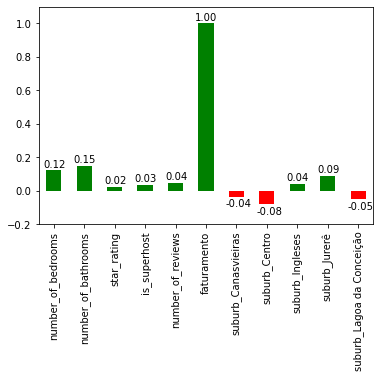

In [47]:
# plot gráfico com as correlações
color = ['green' if x >=0 else 'red' for x in df_corr['faturamento']] 
ax = df_corr['faturamento'].plot.bar(df_corr.columns, df_corr['faturamento'], color=color, ylim = (-0.2, 1.1))
for p in ax.patches:
    y =  p.get_height() + 0.02 if p.get_height() >= 0 else p.get_height() - 0.06
    x = p.get_x() -0.1
    ax.annotate(f"{p.get_height():.2f}", (x, y))
